### Importing Libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# pd.set_option('display.max_rows',2000)
# pd.set_option('display.max_columns',20)
pd.set_option('display.float_format',lambda x: "%.2f" %x)

### Load Data

In [117]:
orders_df = pd.read_csv('./Orders.csv')
orders_df.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [118]:
details_df = pd.read_csv('./Details.csv')
details_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [63]:
orders_df.shape

(500, 5)

In [64]:
details_df.shape

(1500, 7)

## Data Cleaning

#### 1. Remove Duplicates

In [65]:
orders_df[orders_df.duplicated()]

,Order ID,Order Date,CustomerName,State,City


In [66]:
details_df[details_df.duplicated()]

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode


In [67]:
orders_df.drop_duplicates().shape

(500, 5)

In [68]:
details_df.drop_duplicates().shape

(1500, 7)

#### 2. Handle Missing Values

In [69]:
orders_df.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

In [70]:
details_df.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

#### 3. Standardize Formats

In [71]:
orders_df.dtypes

Order ID        object
Order Date      object
CustomerName    object
State           object
City            object
dtype: object

In [72]:
details_df.dtypes

Order ID        object
Amount           int64
Profit           int64
Quantity         int64
Category        object
Sub-Category    object
PaymentMode     object
dtype: object

In [73]:
orders_df.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [74]:
details_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [75]:
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'], format="%d-%m-%Y")
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   Order Date    500 non-null    datetime64[ns]
 2   CustomerName  500 non-null    object        
 3   State         500 non-null    object        
 4   City          500 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 19.7+ KB


In [76]:
orders_df['CustomerName'] = orders_df['CustomerName'].str.strip()

In [77]:
orders_df['CustomerName'] = orders_df['CustomerName'].str.title()

In [78]:
orders_df['State'] = orders_df['State'].str.upper()

In [79]:
orders_df['City'] = orders_df['City'].str.title()

#### 4. Validate Data: Check for data integrity and consistency

In [80]:
print('Unique Order Ids in Order Table:',orders_df['Order ID'].nunique())
print('Total Order Ids in Order Table:',orders_df['Order ID'].count())

Unique Order Ids in Order Table: 500
Total Order Ids in Order Table: 500


## Merge Tables

In [81]:
orders_df.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,2018-03-10,Harivansh,UTTAR PRADESH,Mathura
1,B-25993,2018-02-03,Madhav,DELHI,Delhi
2,B-25973,2018-01-24,Madan Mohan,UTTAR PRADESH,Mathura
3,B-25923,2018-12-27,Gopal,MAHARASHTRA,Mumbai
4,B-25757,2018-08-21,Vishakha,MADHYA PRADESH,Indore


In [82]:
details_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [119]:
merged_df  = orders_df.merge(details_df, how="inner", on="Order ID")
merged_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,5729,64,14,Furniture,Chairs,EMI
1,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,671,114,9,Electronics,Phones,Credit Card
2,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,443,11,1,Clothing,Saree,COD
3,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,57,7,2,Clothing,Shirt,UPI
4,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,227,48,5,Clothing,Stole,COD


In [84]:
merged_df.isna().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

In [85]:
merged_df.dtypes

Order ID                object
Order Date      datetime64[ns]
CustomerName            object
State                   object
City                    object
Amount                   int64
Profit                   int64
Quantity                 int64
Category                object
Sub-Category            object
PaymentMode             object
dtype: object

## Data Exploration and Visualization

In [86]:
merged_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-26055,2018-03-10,Harivansh,UTTAR PRADESH,Mathura,5729,64,14,Furniture,Chairs,EMI
1,B-26055,2018-03-10,Harivansh,UTTAR PRADESH,Mathura,671,114,9,Electronics,Phones,Credit Card
2,B-26055,2018-03-10,Harivansh,UTTAR PRADESH,Mathura,443,11,1,Clothing,Saree,COD
3,B-26055,2018-03-10,Harivansh,UTTAR PRADESH,Mathura,57,7,2,Clothing,Shirt,UPI
4,B-26055,2018-03-10,Harivansh,UTTAR PRADESH,Mathura,227,48,5,Clothing,Stole,COD


In [87]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1500 non-null   object        
 1   Order Date    1500 non-null   datetime64[ns]
 2   CustomerName  1500 non-null   object        
 3   State         1500 non-null   object        
 4   City          1500 non-null   object        
 5   Amount        1500 non-null   int64         
 6   Profit        1500 non-null   int64         
 7   Quantity      1500 non-null   int64         
 8   Category      1500 non-null   object        
 9   Sub-Category  1500 non-null   object        
 10  PaymentMode   1500 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 129.0+ KB


In [88]:
merged_df.describe()

,Order Date,Amount,Profit,Quantity
count,1500,1500.00,1500.00,1500.00
mean,2018-06-14 21:56:09.600000,291.85,24.64,3.74
min,2018-01-01 00:00:00,4.00,-1981.00,1.00
25%,2018-03-08 18:00:00,47.75,-12.00,2.00
50%,2018-05-28 00:00:00,122.00,8.00,3.00
75%,2018-10-01 00:00:00,326.25,38.00,5.00
max,2018-12-31 00:00:00,5729.00,1864.00,14.00
std,NaN,461.92,168.56,2.18


In [89]:
merged_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-26055,2018-03-10,Harivansh,UTTAR PRADESH,Mathura,5729,64,14,Furniture,Chairs,EMI
1,B-26055,2018-03-10,Harivansh,UTTAR PRADESH,Mathura,671,114,9,Electronics,Phones,Credit Card
2,B-26055,2018-03-10,Harivansh,UTTAR PRADESH,Mathura,443,11,1,Clothing,Saree,COD
3,B-26055,2018-03-10,Harivansh,UTTAR PRADESH,Mathura,57,7,2,Clothing,Shirt,UPI
4,B-26055,2018-03-10,Harivansh,UTTAR PRADESH,Mathura,227,48,5,Clothing,Stole,COD


#### Customer Analysis 

  CustomerName  Amount
0    Harivansh    9902
1       Madhav    9365
2  Madan Mohan    7766
3        Shiva    6339
4     Vishakha    6120
5       Vrinda    5820
6       Lalita    5809
7     Priyanka    5762
8       Shruti    5750
9     Abhijeet    5691


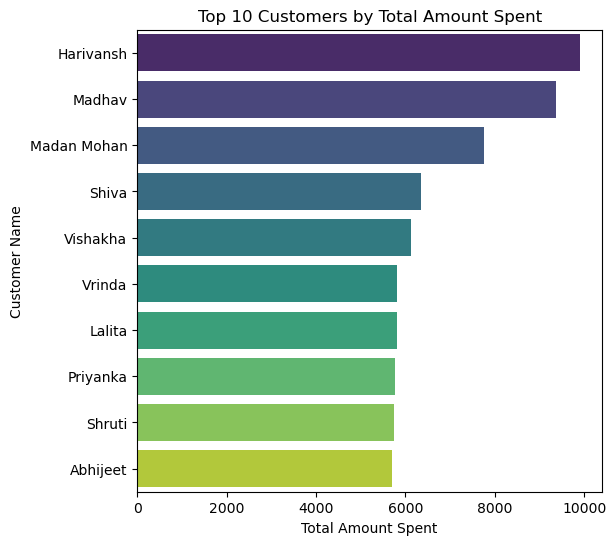

In [90]:
# Top 10 customers by total amount spent

top_customers = merged_df.groupby('CustomerName')['Amount'].sum().sort_values(ascending=False).reset_index().head(10)
print(top_customers)

# Visualization
plt.figure(figsize=(6, 6))
sns.barplot(x=top_customers.Amount, y=top_customers.CustomerName, hue=top_customers.CustomerName, palette='viridis')
plt.title('Top 10 Customers by Total Amount Spent')
plt.xlabel('Total Amount Spent')
plt.ylabel('Customer Name')
plt.show()

  CustomerName  Amount
0    Aakanksha   37.00
1      Aarushi  391.75
2       Aastha  546.00
3       Aayush   92.67
4      Aayushi  137.80
5     Abhijeet  406.50
6      Abhijit   78.00
7     Abhishek  266.52
8     Adhvaita  193.00
9        Aditi  253.50


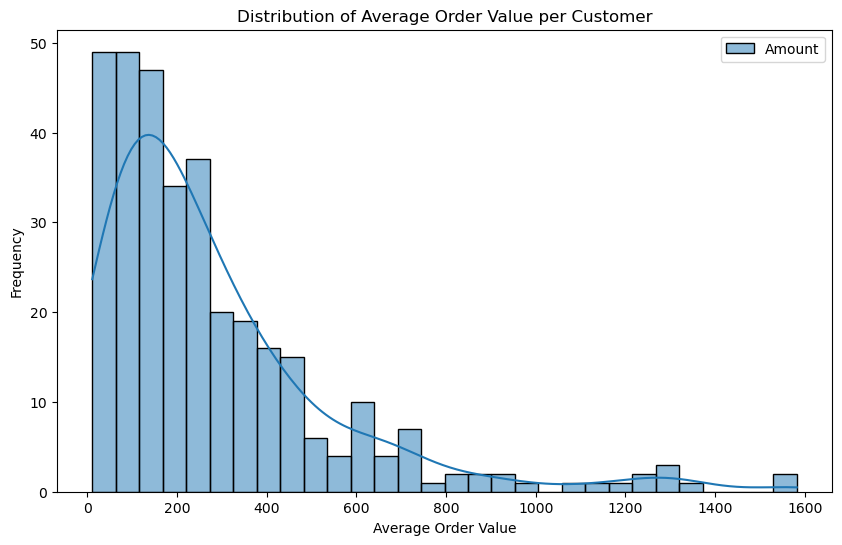

In [91]:
# Avg. Order Value Per Customer

avg_order_value = merged_df.groupby('CustomerName')['Amount'].mean().reset_index()
print(avg_order_value.head(10))

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(avg_order_value, bins=30, kde=True, color='blue')
plt.title('Distribution of Average Order Value per Customer')
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')
plt.show()

CustomerName
Abhishek    21
Priyanka    21
Shreya      18
Shruti      17
Anurag      16
Name: count, dtype: int64


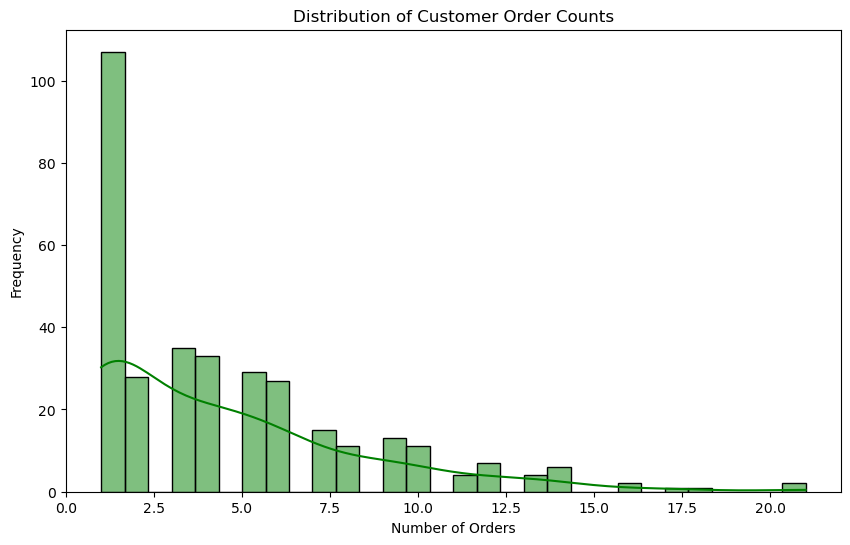

In [92]:
# Frequency of Orders Per Customer

order_counts = merged_df['CustomerName'].value_counts()
frequent_buyers = order_counts[order_counts > 5]
print(frequent_buyers.head())

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(order_counts, bins=30, kde=True, color='green')
plt.title('Distribution of Customer Order Counts')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

#### Geographical Analysis

State
MAHARASHTRA       102498
MADHYA PRADESH     87463
UTTAR PRADESH      38362
DELHI              22957
RAJASTHAN          22334
GUJARAT            21371
PUNJAB             16786
WEST BENGAL        14328
KERALA             13871
BIHAR              13417
Name: Amount, dtype: int64


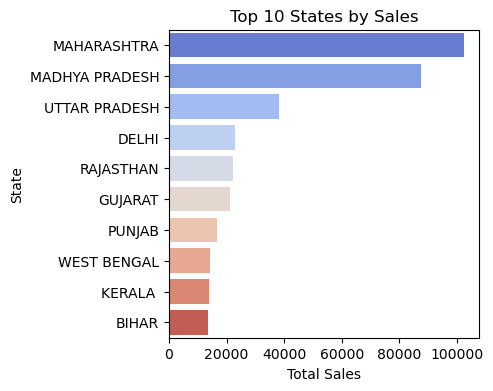

In [93]:
# Which State and cities have highest sales and profits

state_sales = merged_df.groupby('State')['Amount'].sum().sort_values(ascending=False)
city_sales = merged_df.groupby('City')['Amount'].sum().sort_values(ascending=False)
state_profits = merged_df.groupby('State')['Profit'].sum().sort_values(ascending=False)
city_profits = merged_df.groupby('City')['Profit'].sum().sort_values(ascending=False)

print(state_sales.head(10))

# Visualization for States
plt.figure(figsize=(4,4))
sns.barplot(x=state_sales.values[:10], y=state_sales.index[:10], hue=state_sales.index[:10], palette='coolwarm')
plt.title('Top 10 States by Sales')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()


City
Indore                63680
Mumbai                58886
Pune                  43612
Mathura               28747
Bhopal                23783
Delhi                 22957
Chandigarh            21142
Ahmedabad             14543
Kolkata               14328
Thiruvananthapuram    13871
Name: Amount, dtype: int64


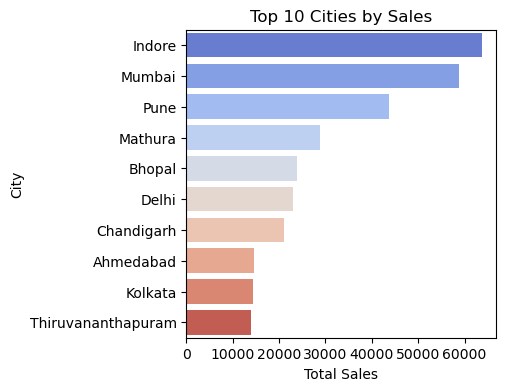

In [94]:

print(city_sales.head(10))

# Visualization for Cities
plt.figure(figsize=(4,4))
sns.barplot(x=city_sales.values[:10], y=city_sales.index[:10], hue=city_sales.index[:10], palette='coolwarm')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

State
MADHYA PRADESH      7382
MAHARASHTRA         6963
UTTAR PRADESH       3358
GUJARAT             3001
TAMIL NADU          2602
KERALA              2435
WEST BENGAL         2074
DELHI               1958
BIHAR               1787
HIMACHAL PRADESH    1662
Name: Profit, dtype: int64


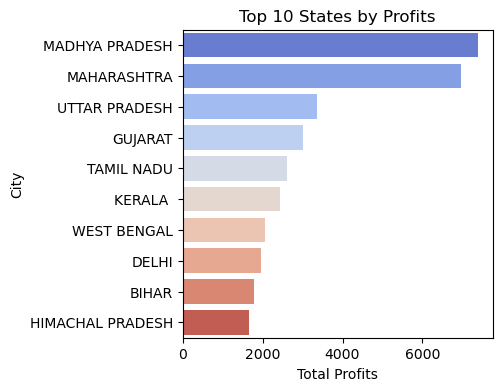

In [95]:
print(state_profits.head(10))

# Visualization for States
plt.figure(figsize=(4,4))
sns.barplot(x=state_profits.values[:10], y=state_profits.index[:10], hue=state_profits.index[:10], palette='coolwarm')
plt.title('Top 10 States by Profits')
plt.xlabel('Total Profits')
plt.ylabel('City')
plt.show()

City
Indore                6763
Pune                  6160
Mathura               3335
Chandigarh            2778
Chennai               2602
Thiruvananthapuram    2435
Kolkata               2074
Delhi                 1958
Ahmedabad             1846
Patna                 1787
Name: Profit, dtype: int64


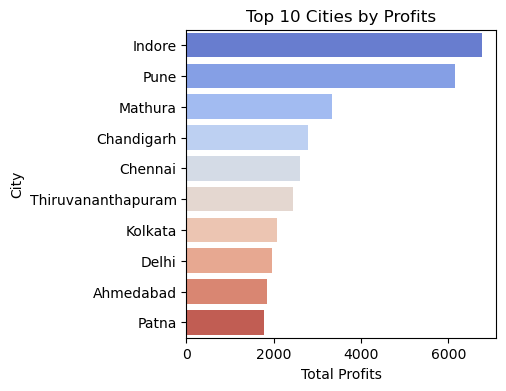

In [96]:

print(city_profits.head(10))

# Visualization for Cities
plt.figure(figsize=(4,4))
sns.barplot(x=city_profits.values[:10], y=city_profits.index[:10], hue=city_profits.index[:10], palette='coolwarm')
plt.title('Top 10 Cities by Profits')
plt.xlabel('Total Profits')
plt.ylabel('City')
plt.show()

<Figure size 1400x1000 with 0 Axes>

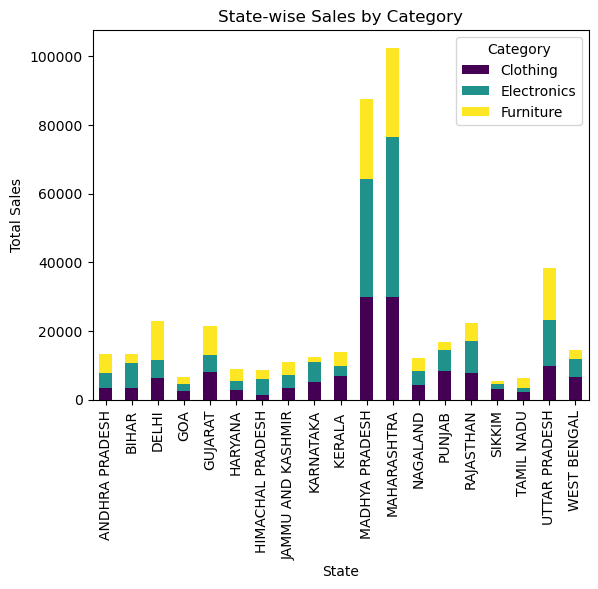

In [97]:
# Regional Trends in Product Category

state_category_trends = merged_df.groupby(['State', 'Category'])['Amount'].sum().unstack()

# Visualization for State Category Trends
plt.figure(figsize=(14, 10))
state_category_trends.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('State-wise Sales by Category')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.show()

<Figure size 1400x1000 with 0 Axes>

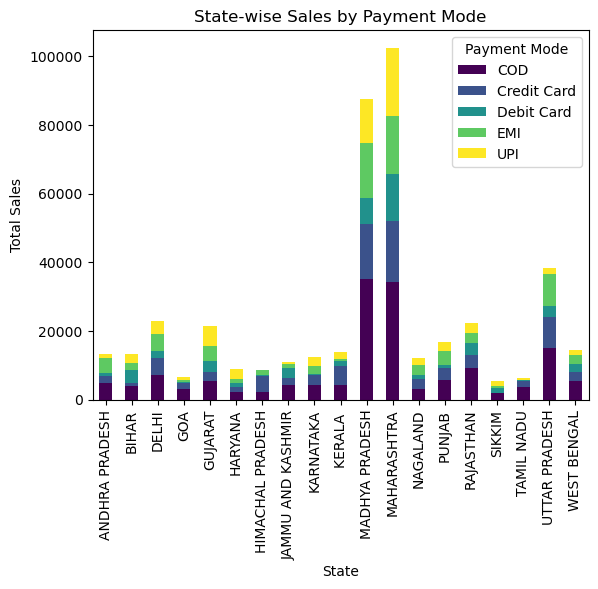

In [98]:
# Regional Trends in Payment Mode

state_payment_trends = merged_df.groupby(['State', 'PaymentMode'])['Amount'].sum().unstack()

# Visualization for State Payment Mode Trends
plt.figure(figsize=(14, 10))
state_payment_trends.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('State-wise Sales by Payment Mode')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Payment Mode')
plt.show()

### Product Analysis

Sub-Category
Saree               795
Hankerchief         741
Stole               671
Furnishings         310
T-shirt             305
Phones              304
Electronic Games    297
Bookcases           297
Printers            291
Chairs              277
Shirt               271
Accessories         262
Skirt               248
Leggings            186
Kurti               164
Trousers            135
Tables               61
Name: Quantity, dtype: int64


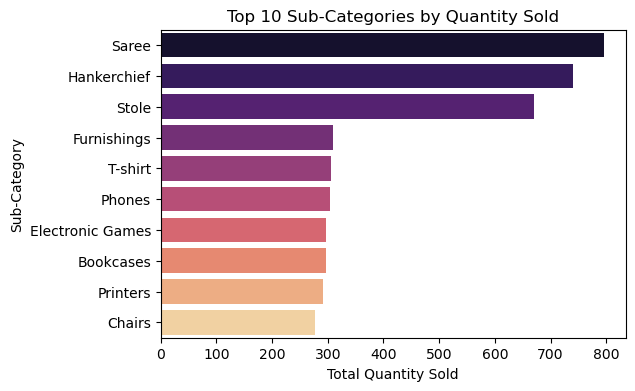

In [99]:
# Sub-Categories with Highest Quantity Sold

sub_category_quantity = merged_df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)
print(sub_category_quantity)

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=sub_category_quantity.values[:10], y=sub_category_quantity.index[:10], hue=sub_category_quantity.index[:10], palette='magma')
plt.title('Top 10 Sub-Categories by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Sub-Category')
plt.show()


Category
Clothing      0.09
Electronics   0.08
Furniture     0.08
dtype: float64


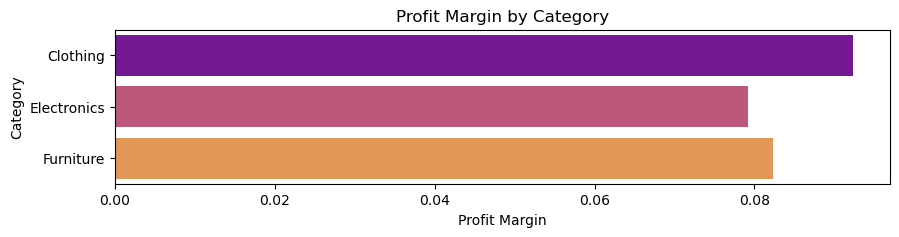

In [100]:
# Profit Margin for Each Category and Sub-Category

category_profit_margin = merged_df.groupby('Category')['Profit'].sum()/merged_df.groupby('Category')['Amount'].sum()


print(category_profit_margin)


# Visualization for Category Profit Margin
plt.figure(figsize=(10,2))
sns.barplot(x=category_profit_margin.values, y=category_profit_margin.index,hue=category_profit_margin.index, palette='plasma')
plt.title('Profit Margin by Category')
plt.xlabel('Profit Margin')
plt.ylabel('Category')
plt.show()

Sub-Category
Accessories         0.15
Bookcases           0.11
Chairs              0.05
Electronic Games   -0.02
Furnishings        -0.06
Hankerchief         0.13
Kurti              -0.12
Leggings           -0.06
Phones              0.04
Printers            0.15
Saree               0.07
Shirt               0.20
Skirt              -0.16
Stole               0.13
T-shirt             0.20
Tables              0.14
Trousers            0.09
dtype: float64


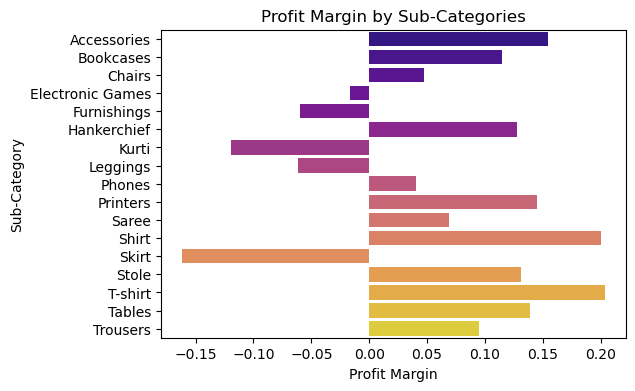

In [101]:
sub_category_profit_margin = merged_df.groupby('Sub-Category')['Profit'].sum()/merged_df.groupby('Sub-Category')['Amount'].sum()

print(sub_category_profit_margin)

# Visualization for Sub-Category Profit Margin
plt.figure(figsize=(6, 4))
sns.barplot(x=sub_category_profit_margin.values, y=sub_category_profit_margin.index,hue=sub_category_profit_margin.index, palette='plasma')
plt.title('Profit Margin by Sub-Categories')
plt.xlabel('Profit Margin')
plt.ylabel('Sub-Category')
plt.show()

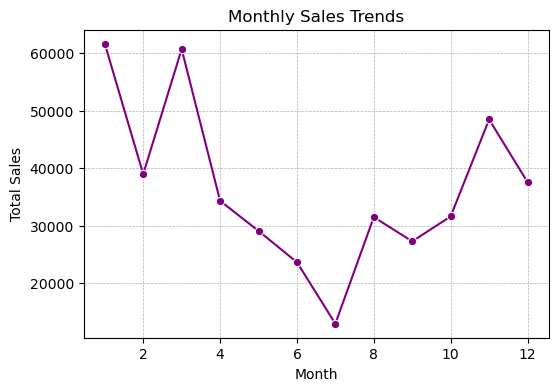

In [102]:
# Seasonal Trends in Product Sales

merged_df['Order Month'] = merged_df['Order Date'].dt.month
monthly_sales = merged_df.groupby('Order Month')['Amount'].sum()

plt.figure(figsize=(6, 4))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='purple')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

### Order Analysis

Quantity    11.23
Amount     875.54
dtype: float64


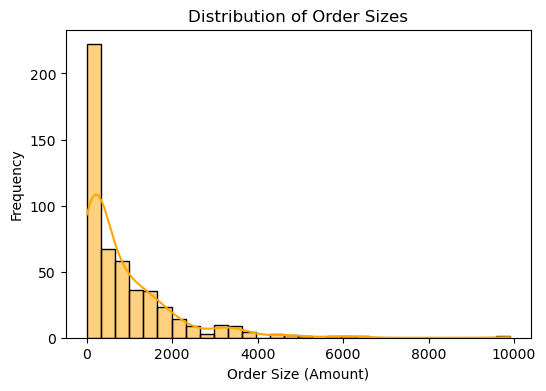

In [103]:
# Average Order Size

avg_order_size = merged_df.groupby('Order ID').agg({'Quantity': 'sum', 'Amount': 'sum'}).mean()
print(avg_order_size)

# Visualization
plt.figure(figsize=(6, 4))
sns.histplot(merged_df.groupby('Order ID')['Amount'].sum(), bins=30, kde=True, color='orange')
plt.title('Distribution of Order Sizes')
plt.xlabel('Order Size (Amount)')
plt.ylabel('Frequency')
plt.show()

             Quantity  Amount
Category                     
Clothing         3.70  152.08
Electronics      3.75  539.83
Furniture        3.89  523.38


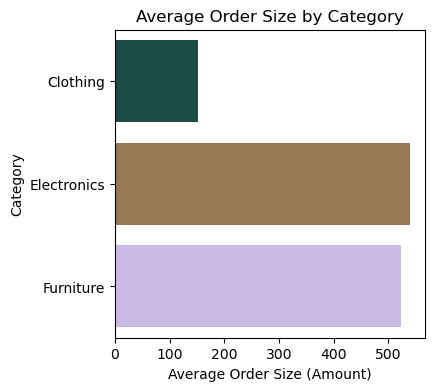

In [104]:
# Order Size by Category

category_order_size = merged_df.groupby('Category').agg({'Quantity': 'mean', 'Amount': 'mean'})


print(category_order_size)

# Visualization for Category Order Size
plt.figure(figsize=(4, 4))
sns.barplot(x=category_order_size['Amount'], y=category_order_size.index, hue=category_order_size.index, palette='cubehelix')
plt.title('Average Order Size by Category')
plt.xlabel('Average Order Size (Amount)')
plt.ylabel('Category')
plt.show()



                  Quantity  Amount
Sub-Category                      
Accessories           3.64  301.78
Bookcases             3.76  719.76
Chairs                3.74  462.46
Electronic Games      3.76  495.80
Furnishings           4.25  184.71
Hankerchief           3.76   72.56
Kurti                 3.49   71.51
Leggings              3.51   39.74
Phones                3.66  555.65
Printers              3.93  800.70
Saree                 3.77  280.07
Shirt                 3.93  109.49
Skirt                 3.88   30.41
Stole                 3.49   96.59
T-shirt               3.96   95.87
Tables                3.59 1330.24
Trousers              3.46  770.23


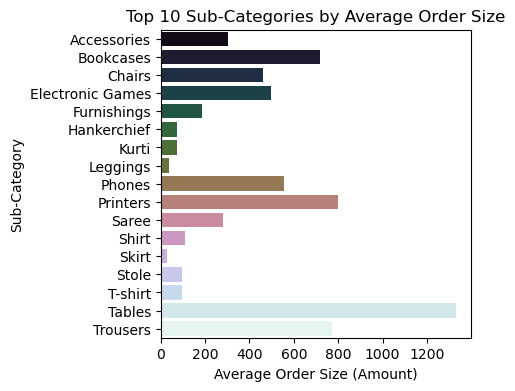

In [105]:
# Order Size by Sub-Category
sub_category_order_size = merged_df.groupby('Sub-Category').agg({'Quantity': 'mean', 'Amount': 'mean'})
print(sub_category_order_size)

# Visualization for Sub-Category Order Size
plt.figure(figsize=(4, 4))
sns.barplot(x=sub_category_order_size['Amount'], y=sub_category_order_size.index,hue=sub_category_order_size.index, palette='cubehelix')
plt.title('Top 10 Sub-Categories by Average Order Size')
plt.xlabel('Average Order Size (Amount)')
plt.ylabel('Sub-Category')
plt.show()

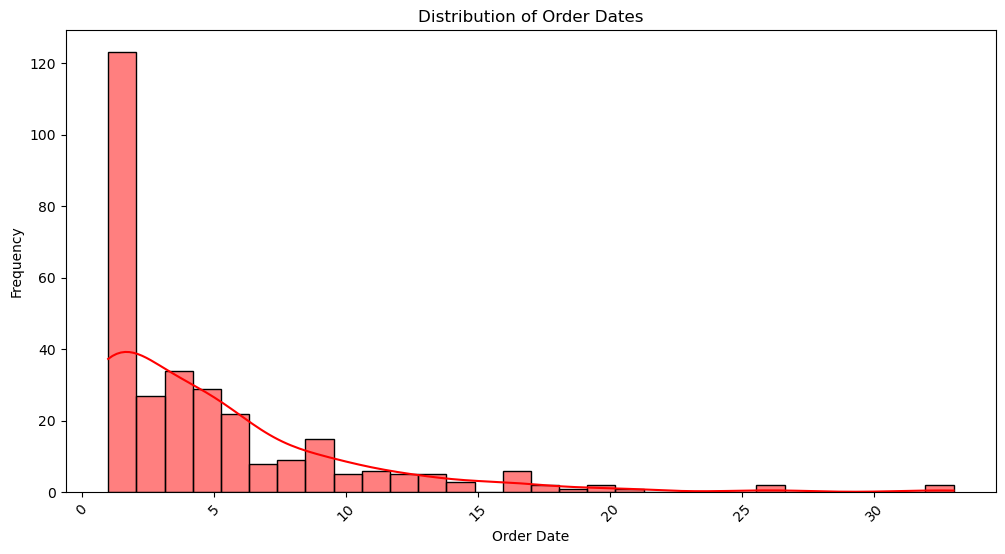

In [106]:
# Distribution of Order Dates

order_date_distribution = merged_df['Order Date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.histplot(order_date_distribution, bins=30, kde=True, color='red')
plt.title('Distribution of Order Dates')
plt.xlabel('Order Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### Payment Mode Analysis

PaymentMode
EMI           649.01
Credit Card   533.33
Debit Card    243.25
COD           226.87
UPI           207.37
Name: Amount, dtype: float64


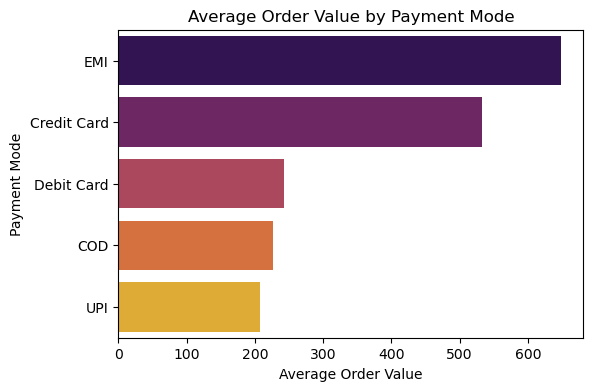

In [107]:
# Payment Modes with Higher Average Order Values

payment_mode_avg_order_value = merged_df.groupby('PaymentMode')['Amount'].mean().sort_values(ascending=False)
print(payment_mode_avg_order_value)

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=payment_mode_avg_order_value.values, y=payment_mode_avg_order_value.index, hue=payment_mode_avg_order_value.index, palette='inferno')
plt.title('Average Order Value by Payment Mode')
plt.xlabel('Average Order Value')
plt.ylabel('Payment Mode')
plt.show()


<Figure size 1400x700 with 0 Axes>

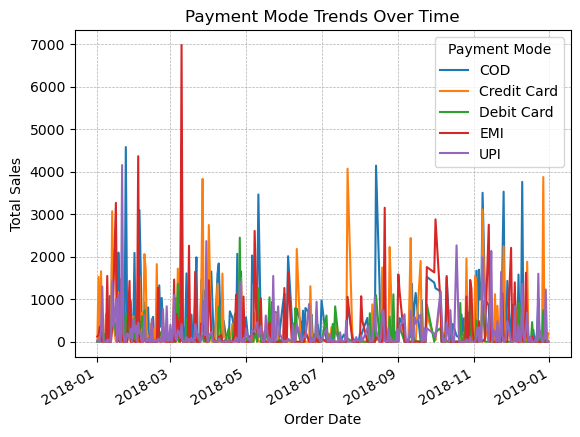

In [108]:
# Trends in Payment Mode Preferences Over Time

payment_mode_trends = merged_df.groupby(['Order Date', 'PaymentMode'])['Amount'].sum().unstack().fillna(0)

plt.figure(figsize=(14, 7))
payment_mode_trends.plot()
plt.title('Payment Mode Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend(title='Payment Mode')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


### Profitability Analysis

In [109]:
# Overall Profit Margin

overall_profit_margin = merged_df['Profit'].sum() / merged_df['Amount'].sum()
print(overall_profit_margin)

0.08443455596647562


          Amount  Profit  Profit Margin
Order ID                               
B-25601     1429    1078           0.75
B-25602     3889     975           0.25
B-25603     2025    -180          -0.09
B-25604      222      22           0.10
B-25605       75       0           0.00
B-25606       87       4           0.05
B-25607       50     -15          -0.30
B-25608     2953    2272           0.77
B-25609      734      24           0.03
B-25610     2105     442           0.21
B-25611      160     -59          -0.37
B-25612      259     -55          -0.21
B-25613     1603       0           0.00
B-25614      592      42           0.07
B-25615       68      20           0.29
B-25616      194     -48          -0.25
B-25617      305    -270          -0.89
B-25618      374     127           0.34
B-25619      353      90           0.25
B-25620      193      46           0.24
B-25621      794      38           0.05
B-25622      534       0           0.00
B-25623      465       3           0.01


C:\Users\User\AppData\Local\Temp\ipykernel_9112\175358990.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profit.values, y=category_profit.index, palette='coolwarm')


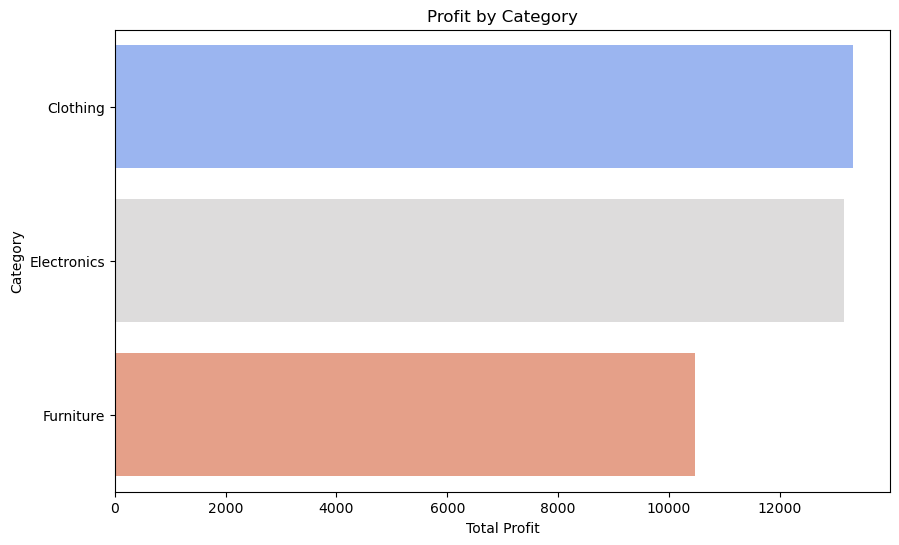

C:\Users\User\AppData\Local\Temp\ipykernel_9112\175358990.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_category_profit.values[:10], y=sub_category_profit.index[:10], palette='coolwarm')


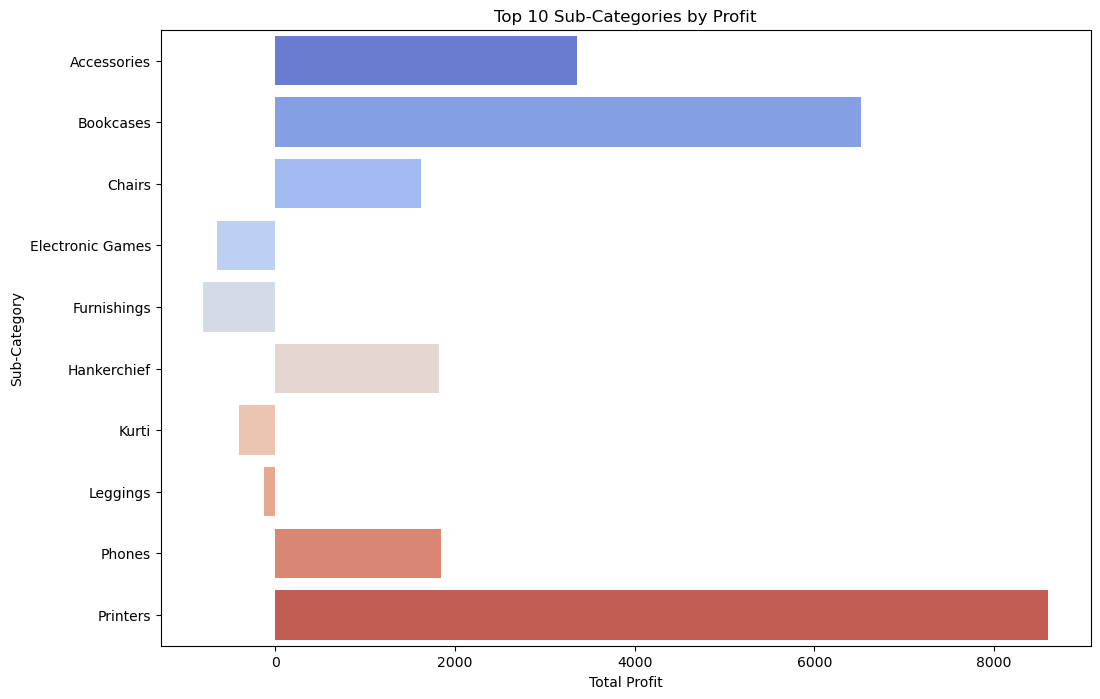

In [110]:
# Profit by Order Size, Category, and Sub-Category

order_size_profit = merged_df.groupby('Order ID').agg({'Amount': 'sum', 'Profit': 'sum'})
order_size_profit['Profit Margin'] = order_size_profit['Profit'] / order_size_profit['Amount']

category_profit = merged_df.groupby('Category')['Profit'].sum()
sub_category_profit = merged_df.groupby('Sub-Category')['Profit'].sum()

print(order_size_profit)
print(category_profit)
print(sub_category_profit)

# Visualization for Category Profit
plt.figure(figsize=(10, 6))
sns.barplot(x=category_profit.values, y=category_profit.index, palette='coolwarm')
plt.title('Profit by Category')
plt.xlabel('Total Profit')
plt.ylabel('Category')
plt.show()

# Visualization for Sub-Category Profit
plt.figure(figsize=(12, 8))
sns.barplot(x=sub_category_profit.values[:10], y=sub_category_profit.index[:10], palette='coolwarm')
plt.title('Top 10 Sub-Categories by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.show()


Sub-Category
Electronic Games   -644
Furnishings        -806
Kurti              -401
Leggings           -130
Skirt              -315
Name: Profit, dtype: int64


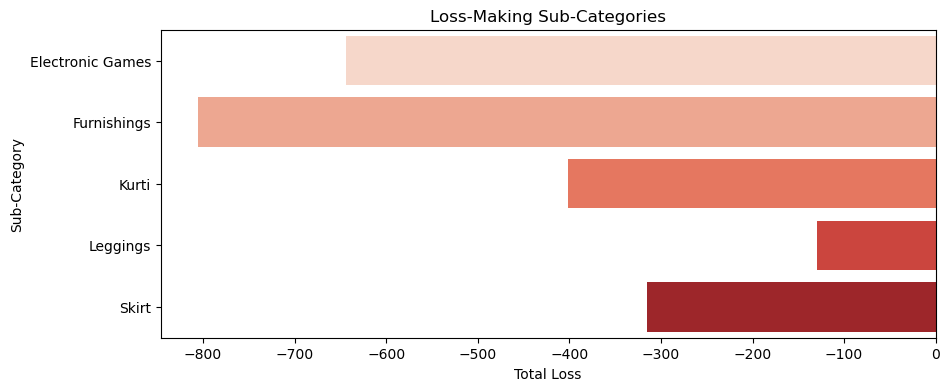

In [111]:
# Loss-Making Categories or Sub-Categories

# loss_making_categories = merged_df.groupby('Category')['Profit'].sum()
loss_making_sub_categories = merged_df.groupby('Sub-Category')['Profit'].sum()

# print(loss_making_categories[loss_making_categories < 0])
print(loss_making_sub_categories[loss_making_sub_categories < 0])

# # Visualization for Loss-Making Categories
# plt.figure(figsize=(10, 6))
# sns.barplot(x=loss_making_categories[loss_making_categories < 0].values, y=loss_making_categories[loss_making_categories < 0].index, palette='Reds')
# plt.title('Loss-Making Categories')
# plt.xlabel('Total Loss')
# plt.ylabel('Category')
# plt.show()

# Visualization for Loss-Making Sub-Categories
plt.figure(figsize=(10, 4))
sns.barplot(x=loss_making_sub_categories[loss_making_sub_categories < 0].values, y=loss_making_sub_categories[loss_making_sub_categories < 0].index,hue=loss_making_sub_categories[loss_making_sub_categories < 0].index, palette='Reds')
plt.title('Loss-Making Sub-Categories')
plt.xlabel('Total Loss')
plt.ylabel('Sub-Category')
plt.show()


### Time Series Analysis

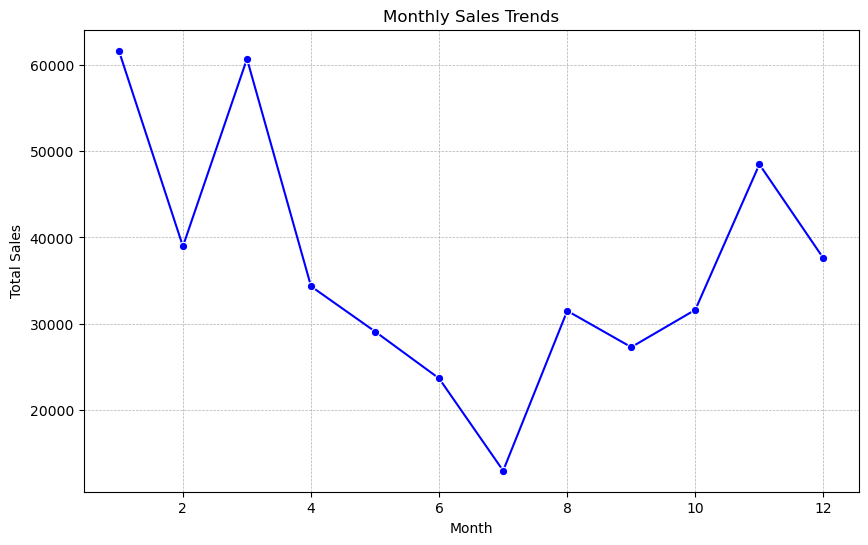

In [112]:
# Monthly Sales Trends

# merged_df['Order Year'] = merged_df['Order Date'].dt.year
monthly_sales = merged_df.groupby('Order Month')['Amount'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='blue')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

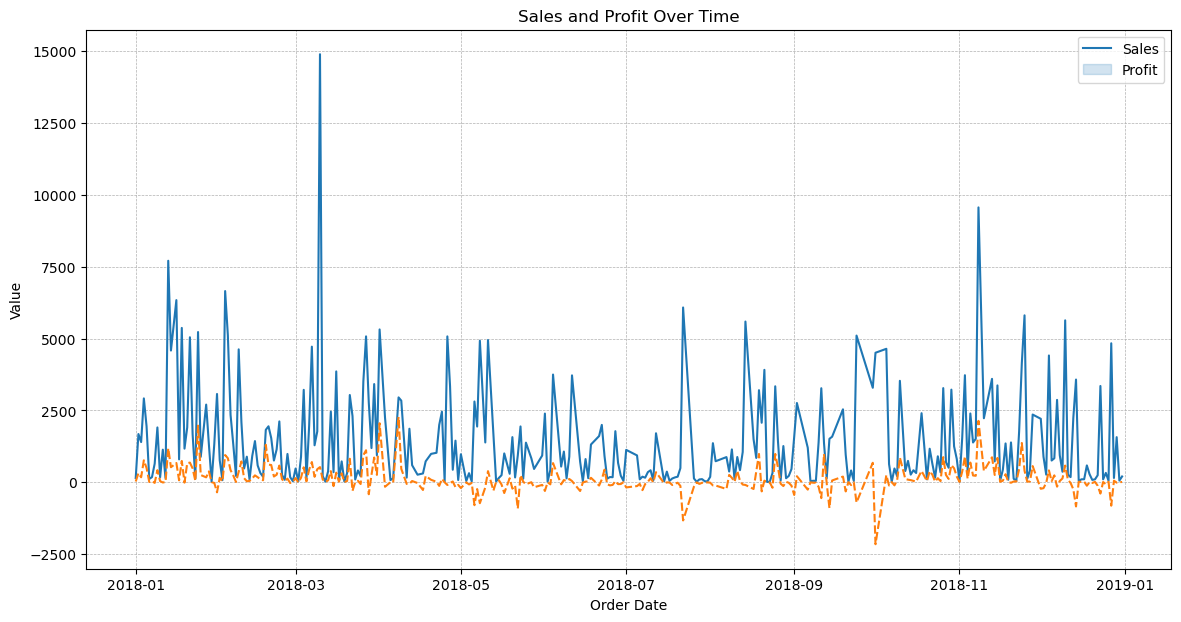

In [113]:
# Sales and Profit Over Time

daily_sales_profit = merged_df.groupby('Order Date').agg({'Amount': 'sum', 'Profit': 'sum'})

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sales_profit)
plt.title('Sales and Profit Over Time')
plt.xlabel('Order Date')
plt.ylabel('Value')
plt.legend(['Sales', 'Profit'])
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


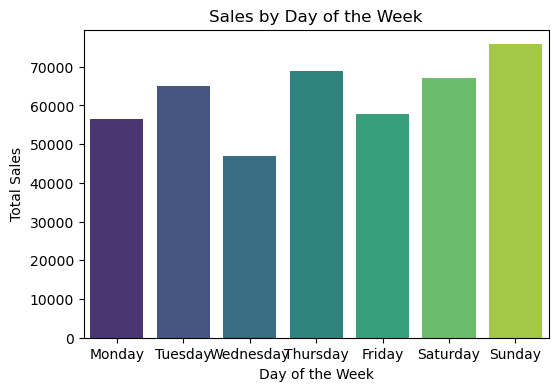

In [114]:
# Sales and Profit by Day of the Week or Month

merged_df['Order Day'] = merged_df['Order Date'].dt.day_name()
day_of_week_sales = merged_df.groupby('Order Day')['Amount'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(6, 4))
sns.barplot(x=day_of_week_sales.index, y=day_of_week_sales.values,hue=day_of_week_sales.index, palette='viridis')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

### Customer Segmentation

              Amount  Order Count
CustomerName                     
Harivansh       9902            9
Madhav          9365           13
Madan Mohan     7766            9
Shiva           6339            9
Vishakha        6120           13
Vrinda          5820           12
Lalita          5809            6
Priyanka        5762           21
Shruti          5750           17
Abhijeet        5691           14


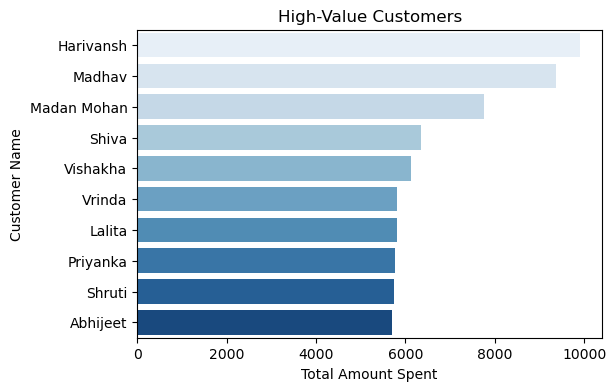

              Amount  Order Count
CustomerName                     
Abhishek        5597           21
Priyanka        5762           21
Shreya          4365           18
Shruti          5750           17
Yogesh          5421           16
Anurag          4395           16
Jahan           3007           14
Sarita          5449           14
Abhijeet        5691           14
Kirti           3216           14


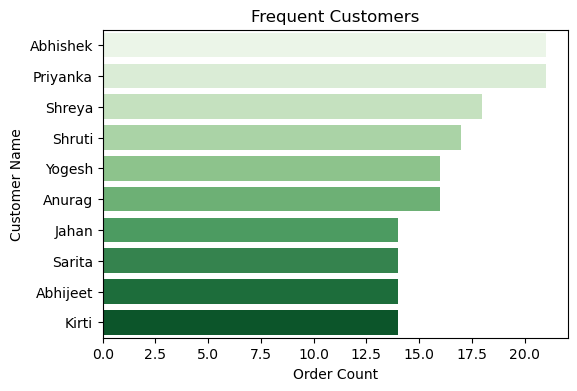

In [115]:
# Segment Customers Based on Purchasing Behavior

customer_segments = merged_df.groupby('CustomerName').agg({
    'Amount': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Order Count'})

# Define segments based on thresholds
high_value_customers = customer_segments[customer_segments['Amount'] > 1000].sort_values(by='Amount',ascending=False)  # Example threshold
frequent_customers = customer_segments[customer_segments['Order Count'] > 10].sort_values(by='Order Count',ascending=False)  # Example threshold

print(high_value_customers.head(10))

# Visualization for High-Value Customers
plt.figure(figsize=(6, 4))
sns.barplot(x=high_value_customers['Amount'][:10], y=high_value_customers.index[:10],hue=high_value_customers.index[:10], palette='Blues')
plt.title('High-Value Customers')
plt.xlabel('Total Amount Spent')
plt.ylabel('Customer Name')
plt.show()

print(frequent_customers.head(10))

# Visualization for Frequent Customers
plt.figure(figsize=(6,4))
sns.barplot(x=frequent_customers['Order Count'][:10], y=frequent_customers.index[:10],hue=frequent_customers.index[:10], palette='Greens')
plt.title('Frequent Customers')
plt.xlabel('Order Count')
plt.ylabel('Customer Name')
plt.show()


In [116]:
# Characteristics of Each Customer Segment

high_value_characteristics = high_value_customers.describe()
frequent_characteristics = frequent_customers.describe()

print(high_value_characteristics)
print(frequent_characteristics)


       Amount  Order Count
count  142.00       142.00
mean  2631.24         7.37
std   1671.13         4.05
min   1013.00         1.00
25%   1444.75         5.00
50%   1951.50         7.00
75%   3408.75        10.00
max   9902.00        21.00
       Amount  Order Count
count   27.00        27.00
mean  4198.74        13.81
std   1776.67         2.76
min   1367.00        11.00
25%   3083.50        12.00
50%   4365.00        13.00
75%   5523.00        14.00
max   9365.00        21.00
